<a href="https://colab.research.google.com/github/COSC2779-DeepLearning/DeepLearning-A2/blob/master/A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [22]:
!cp /content/drive/'My Drive'/'Colab Notebooks'/StanceDataset.zip .
!unzip -q -o StanceDataset.zip -d data
!rm StanceDataset.zip
!unzip -uq "/content/drive/My Drive/Colab Notebooks/StanceDataset.zip" -d "/content/drive/My Drive/Colab Notebooks/data"

replace /content/drive/My Drive/Colab Notebooks/data/StanceDataset/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace /content/drive/My Drive/Colab Notebooks/data/StanceDataset/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [2]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE
import numpy as np
import pandas as pd

import tensorflow_datasets as tfds
import pathlib
import shutil
import tempfile

from  IPython import display
from matplotlib import pyplot as plt

In [10]:
stance_df = pd.read_csv("../content/drive/My Drive/Colab Notebooks/StanceDataset/train.csv", index_col = None, header = 0, 
                        engine = 'python')
stance_df.head()

,Tweet,Target,Stance,Opinion Towards,Sentiment
0,"@tedcruz And, #HandOverTheServer she wiped cle...",Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
1,Hillary is our best choice if we truly want to...,Hillary Clinton,FAVOR,1. The tweet explicitly expresses opinion abo...,pos
2,@TheView I think our country is ready for a fe...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
3,I just gave an unhealthy amount of my hard-ear...,Hillary Clinton,AGAINST,1. The tweet explicitly expresses opinion abo...,neg
4,@PortiaABoulger Thank you for adding me to you...,Hillary Clinton,NONE,3. The tweet is not explicitly expressing opi...,pos


In [14]:
stance_df['Stance'] = stance_df['Stance'].replace("NONE", "NEITHER")

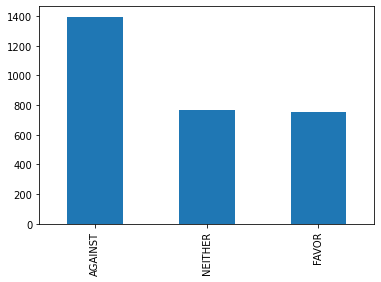

In [17]:
stance_df['Stance'].value_counts().plot(kind='bar')